# 1. Metriken

**a)** Führe die folgende Zelle aus, um eine Confusion Matrix zu erhatlten. Bestimme daraus die Prävalenz, den Bias, die Sensitivität und Spezifität, sowie Precision und Recall.

In [ ]:
#@title Der Code ist hier nicht weiter interessant, ihr braucht die Zelle einfach nur auszuführen.
import numpy as np
import random as rd
import pandas as pd
from sklearn.metrics import confusion_matrix

rd.seed(0)

fraction_negatives = 0.42
gesamtmenge = 200

y_true=np.concatenate((np.ones((1,int(gesamtmenge*(1-fraction_negatives)))),np.zeros((1,int(gesamtmenge*fraction_negatives)))),1).T
positive_pred_distribution = np.array([min(1,rd.gauss(0.75,0.25)) for i in range(0,int(gesamtmenge*(1-fraction_negatives)))])
negative_pred_distribution = np.array([max(0,rd.gauss(0.33,0.2)) for i in range(0,int(gesamtmenge*fraction_negatives))])
predictions = np.concatenate((positive_pred_distribution,negative_pred_distribution),0)
y_hat = predictions >= 0.66
conf_mat = pd.DataFrame(confusion_matrix(y_true,y_hat), index=["negativ","positiv"],columns=["'negativ' klassifiziert", "'positiv' klassifiziert"])
conf_mat

,'negativ' klassifiziert,'positiv' klassifiziert
negativ,79,5
positiv,50,66


Prävalenz: $p = \frac{50+66}{50+66+79+5} = \frac{116}{200} = 0.58$

Bias: $b = \frac{5+61}{50+66+79+5} = \frac{71}{200} = 0.355$

Sensitivität: $sens = \frac{66}{116} = 0.569$

Spezifität: $spez = \frac{79}{84} = 0.940$

Precision: $prec = \frac{66}{71} = 0.930$

Recall: $rec = sens = 0.569$

**b)** Angenommen, ein Klassifikator hat eine Sensitivität von $0.86$, eine Spezifität von $0.85$ und einen F1-Score von $0.12$. Wie groß ist die Prävalenz $p$?


Aus F1 und Sensitivität lässt sich ein Wert für die Precision berechnen:

$F1=\frac{prec*sens}{prec+sens} = \frac{prec\cdot 0.86}{prec+0.86} \overset{!}{=} 0.12$

$\Rightarrow 0.12\left(prec+0.86\right) = 0.86\cdot prec$

$\Rightarrow prec \approx 0.14 $

Mit der Grundmenge $G$ lässt sich dann die Precision nach der Prävalenz $p$ umstellen:

$prec=\frac{TP}{PP}=\frac{TP}{TP+FP}=\frac{sens\cdot P}{sens\cdot P+(1-spez)N} = \frac{sens\cdot p\cdot G}{sens\cdot p\cdot G+(1-spez)(1-p)G} = \frac{sens\cdot p}{sens\cdot p+(1-spez)(1-p)}= \frac{0.86p}{0.86p+(1-0.85)(1-p)} = \frac{0.86p}{0.71p+0.15} \overset{!}{=} 0.14$

$\Rightarrow 0.14\left(0.71p+0.15\right) = 0.86p$

$\Rightarrow p = \frac{0.14\cdot 0.15}{0.86-0.14\cdot 0.71} = 0.0276 = 2.76$%

Führe die nächste Zelle aus. Der Code ist absichtlich ausgeblendet, da ihr ihn für diese Übung nicht zu verstehen braucht. Die Zelle erstellt einen Plot, den man interaktiv über einen Schieberegler verändern kann. Der Plot visualisiert das letzte Layer eines Neuronalen Netzes, das eine Klassifikation vornimmt. Das Layer besteht aus einer Sigmoid-Funktion, die die Inputs (repräsentiert durch die senkrechten Striche) in Wahrscheinlichkeiten, also Werte zwischen 0 und 1 umrechnet. Die Farbe der Striche codiert, ob es sich um einen positiven (gelb) oder einen negativen (blau) Wert handelt. Der grüne, wagrechte Strich repräsentiert die Grenze $\alpha$, ab der Werte als positiv klassifiziert werden. Über den Schieberegler kann man $\alpha$ zwischen 0.01 und 0.99 verschieben. 

**c)** Nutze diese Möglichkeit, $\alpha$ verändern zu können, um das optimale $\alpha$ zu schätzen. Skizziere dann per Hand eine PRC- und eine ROC-Kurve. Überlege Dir dafür auch, was in den Grenzfällen $\alpha=0$ und $\alpha=1$ passiert. Gib dann eine zweite Schätzung für den optimalen Wert von $\alpha$, basierend auf deiner Skizze, an.

In [ ]:
#@markdown Ihr müsst diese Zelle nur ausführen, der Code ist nicht weiter interessant
import math
import random
import os

import matplotlib.pyplot as plt

import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

random.seed(0)
pal = sns.color_palette("colorblind")

def sigmoid(x):
  return 1/(1+np.exp(-x))

def inv_sigmoid(x):
  return np.log(x/(1-x))

x = np.linspace(-10, 10, num=1601)
f1 = sigmoid(x)

def update(alpha):
  plt.figure(figsize=(24,12))
  plt.plot(x,f1,lw=2)
  plt.hlines(alpha, -10, np.log(alpha/(1-alpha)),colors=pal[2],lw=3)
  tp = 10**(-6)
  fp = 10**(-6)
  fn = 10**(-6)
  tn = 10**(-6)
  for p,y in zip(predictions,y_true):
    if y==0:    
      if p < alpha:
        plt.vlines(inv_sigmoid(p),0,p,colors=pal[0],alpha=0.2)
        tn += 1
      else:
        plt.vlines(inv_sigmoid(p),0,p,colors=pal[0])
        fp += 1
    else: 
      if p >= alpha:
        plt.vlines(inv_sigmoid(p),0,p,colors=pal[1])
        tp += 1
      else:
        plt.vlines(inv_sigmoid(p),0,p,colors=pal[1],alpha=0.2)
        fn += 1
  tex = 'TPR: ' + str(int(1000*(tp+10**(-6))/(tp+fn+10**(-6)))/1000) + '\nFPR: ' + str(int(1000*(fp+10**(-6))/(fp+tn+10**(-6)))/1000) + '\nPrecision: ' + str(int(1000*(tp+10**(-6))/(tp+fp+10**(-6)))/1000) + '\nRecall: ' + str(int(1000*(tp+10**(-6))/(tp+fn+10**(-6)))/1000)
  if alpha > 0.8:
    tex_y = 0.6
  else:
    tex_y = 0.8
  plt.text(-8,tex_y,tex,fontsize=20)

interact(update, alpha = widgets.FloatSlider(value=0.5,min=0.005, max=0.995, step = 0.01,layout=Layout(width='1000px')))
plt.show()

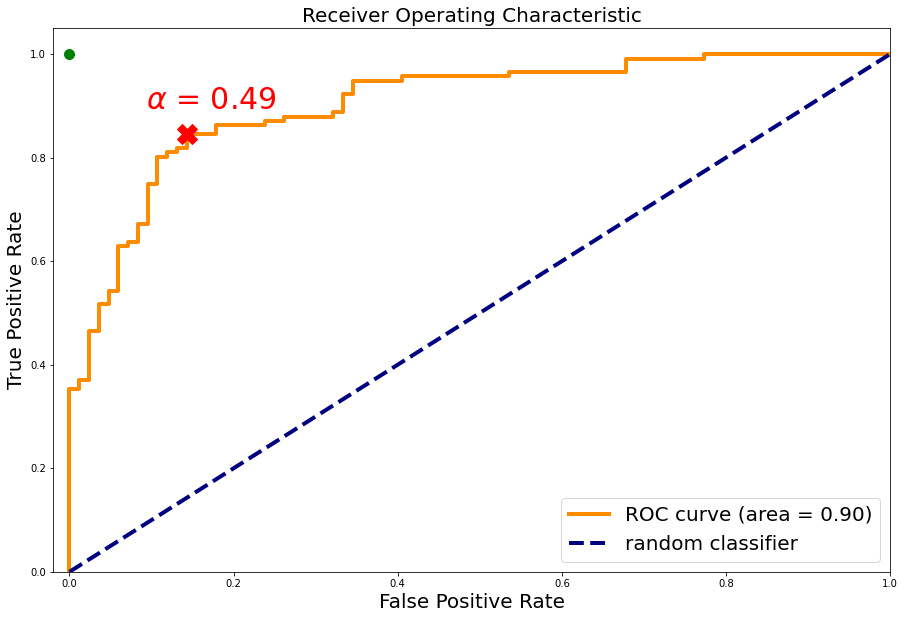

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, alphas = roc_curve(y_true, predictions) # overall 624 samples
opt_roc_point = np.argmax(tpr-fpr)
auroc = auc(fpr, tpr)

alpha_string = "{:.2f}".format(alphas[opt_roc_point])

plt.figure(figsize=(15,10))
lw = 4
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random classifier')
plt.plot(0,1,'g.',ms=20)
plt.plot(fpr[opt_roc_point],tpr[opt_roc_point],'rX',ms=20)
plt.text(fpr[opt_roc_point]-0.05,tpr[opt_roc_point]+0.05,r'$\alpha$ = '+ alpha_string,color='red',size=30)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristic',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

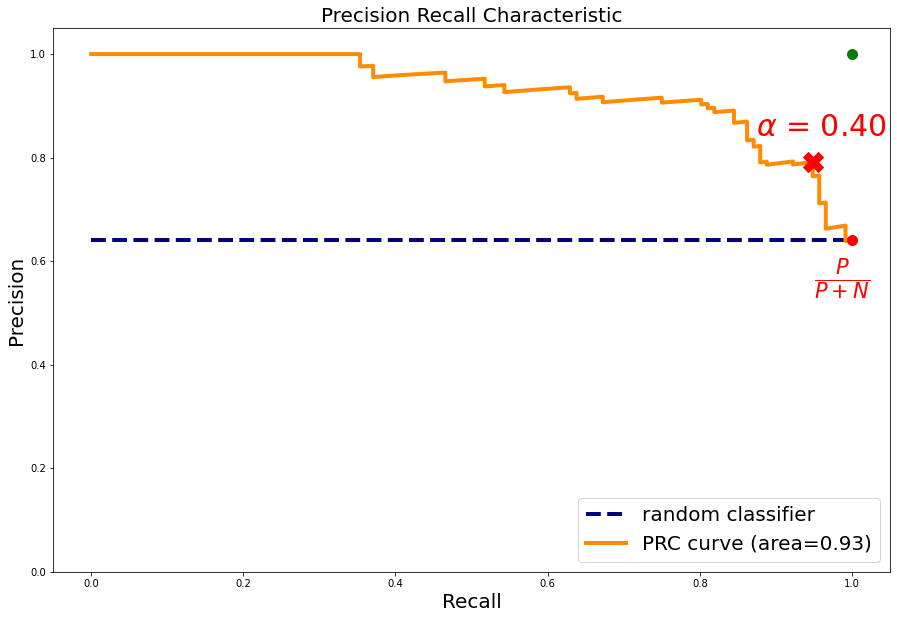

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

prec, rec, betas = precision_recall_curve(y_true, predictions)
opt_prc_point = np.argmax(prec+rec)
auprc = auc(rec,prec)

beta_string = "{:.2f}".format(betas[opt_prc_point])

plt.figure(figsize=(15,10))
plt.plot([0, 1], [prec[0], prec[0]], color='navy', linestyle='--', label='random classifier',lw=lw)
plt.plot(rec, prec, color='darkorange', lw=lw, label='PRC curve (area=%0.2f)' % auprc)
plt.plot(1,prec[0],'r.',ms=20)
plt.text(0.95,0.55,r'$\frac{P}{P+N}$',color='red',size=30)
plt.plot(1,1,'g.',ms=20)
plt.ylim([0.0, 1.05])
plt.plot(rec[opt_prc_point],prec[opt_prc_point],'rX',ms=20)
plt.text(rec[opt_prc_point]-0.075,prec[opt_prc_point]+0.05,r'$\alpha$ = '+ beta_string,color='red',size=30)
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.title('Precision Recall Characteristic',fontsize=20)
plt.legend(loc='lower right',fontsize=20)
plt.show()

# 2. Validierungsverfahren

**a)** Führe die folgende Zelle aus, um die beiden Datensätze *data_for_training.csv* und *data_for_testing.csv* zu importieren. Bei den Daten handelt es sich um einen zufälligen Split eines Datensatzes für [Weinqualität](https://www.kaggle.com/vishalkumbhar1997/wine-quality-prediction-with-logistic-regression). Die Aufgabe besteht darin, einen Klassifikator zu erstellen, der aus den Features die Qualität (`quality`) richtig erkennt. Die Qualität ist dabei für diese Aufgabe binär in gut (1) und schlecht (0) codiert. Führe dann die nächste Zelle aus. Diese erstellt mit der Bibliothek `sklearn` einen Entscheidungsbaum (Der ist das Thema der nächsten Vorlesung, die genaue Funktionsweise ist für diese Übung nicht wichtig), trainiert ihn auf dem Datensatz *data_for_training.csv* und testet ihn dann auf dem Datensatz *data_for_testing.csv*. Wie ihr seht, ist der Score (hier wird standardmäßig die Accuracy berechnet) auf dem zweiten Datensatz deutlich niedriger. Hier liegt also Overfitting vor.

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from google.colab import drive
drive.mount('/content/gdrive')

train_wines = pd.read_csv('/content/gdrive/MyDrive/data_for_training.csv')
test_wines = pd.read_csv('/content/gdrive/MyDrive/data_for_testing.csv')

train_wines

Mounted at /content/gdrive


,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3859,1,7.3,0.25,0.26,7.2,0.048,52.0,207.0,0.99587,3.12,0.37,9.2,0
1,4675,1,5.7,0.21,0.37,4.5,0.040,58.0,140.0,0.99332,3.29,0.62,10.6,1
2,513,1,7.4,0.36,0.33,1.4,0.025,27.0,55.0,0.99150,3.21,0.33,11.2,1
3,5490,0,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,0
4,4329,1,6.4,0.23,0.26,8.1,0.054,47.0,181.0,0.99540,3.12,0.49,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,5319,0,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,1
642,3766,1,6.9,0.40,0.17,12.9,0.033,59.0,186.0,0.99754,3.08,0.49,9.4,0
643,4250,1,6.7,0.11,0.26,14.8,0.053,44.0,95.0,0.99676,3.20,0.35,9.8,1
644,4191,1,7.8,0.27,0.35,1.2,0.050,36.0,140.0,0.99138,3.09,0.45,11.2,0


In [ ]:
y = train_wines['quality']
X = train_wines.drop('quality',axis=1)

y_test = test_wines['quality']
X_test = test_wines.drop('quality',axis=1)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X,y)

# training und validation accuracy
print("Tree with depth " + str(tree.get_depth()) + "; train score: "+str(tree.score(X,y)) + "; val score: "+str(tree.score(X_test,y_test)))

Tree with depth 13; train score: 1.0; val score: 0.7003610108303249


**b)** Teile den Datensatz *data_for_training.csv* in einen Trainings- und einen Validierungsdatensatz auf. Der Datensatz *data_for_testing.csv* wird fürs erste nicht weiter beachtet. Nutze die in der Vorlesung vorgestellten Mehtoden der Validierung und Kreuzvalidierung um Hyperparameterkonfigurationen zu finden, die weniger overfitten als die Standardkonfiguration. 

**Hinweis:** Der Entscheidungsbaum hat verschiedene Hyperparamter, unter anderem die maximale Baumtiefe (`max_depth`) und das Teilungskriterium (`criterion`). Man kann zum Beispiel auch spezifizieren, wie viele Parameter bei jeder Teilung berücksichtigt werden sollen (`max_features`). Die Erklärung aller Parameter kann [hier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) nachgelesen werden. Ihr könnt euch bei dieser Aufgabe aber auch auf einen Parameter (z.B. `max_depth`) konzentrieren und für den einen optimalen Wert finden.

**Hinweis2:** Die Bibliothek `sklearn` liefert viele Optionen zur Hyperparameteroptimierung und Validierung. Bei Interesse findet ihr euch [hier](https://scikit-learn.org/stable/modules/cross_validation.html) und [hier](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) weitere Infos. Die Klasse `sklearn.model_selection.cross_val_score` bietet z.B. die Möglichkeit, unterschiedliche und sogar eigene Gütekriterien bei der Kreuzvalidierung zu berechen. Hier kann man einfach ein bisschen ausprobieren!

**c)** Teste deinen fertigen Klassifikator auf dem bei b) nicht berücksichtigten Datensatz *data_for_testing.csv*. Wie gut ist dein Ergebnis?

In [ ]:
training_set = train_wines.sample(frac=0.8,random_state=0)
validation_set = train_wines.drop(training_set.index,axis=0)

y_train = training_set['quality']
X_train = training_set.drop('quality',axis=1)

y_val = validation_set['quality']
X_val = validation_set.drop('quality',axis=1)

In [ ]:
# Hyperparameter Optimierung der max_depth mit einfacher Validierung
trees = []
val_scores = []
min_tree_depth = 1
max_tree_depth = 31
for i in range(min_tree_depth,max_tree_depth):
  trees.append(DecisionTreeClassifier(max_depth=i).fit(X_train,y_train))
  val_scores.append(trees[i-min_tree_depth].score(X_val,y_val))
best_index = np.argmax(val_scores)
# da wir unseren Baum jetzt nicht mehr verändern, können wir ihn nochmal neu trainieren, dieses mal auf allen Trainingsdaten
best_tree = trees[best_index].fit(X,y)
print(str(best_tree) + "; valid score: "+str(val_scores[best_index])+ "; test score: "+str(best_tree.score(X_test,y_test)))

DecisionTreeClassifier(max_depth=2); valid score: 0.7751937984496124; test score: 0.7354306343476018


[Text(167.4, 181.2, 'X[12] <= 10.25\ngini = 0.454\nsamples = 646\nvalue = [225, 421]'),
 Text(83.7, 108.72, 'X[3] <= 0.265\ngini = 0.499\nsamples = 314\nvalue = [165, 149]'),
 Text(41.85, 36.23999999999998, 'gini = 0.41\nsamples = 118\nvalue = [34, 84]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.443\nsamples = 196\nvalue = [131, 65]'),
 Text(251.10000000000002, 108.72, 'X[7] <= 16.5\ngini = 0.296\nsamples = 332\nvalue = [60, 272]'),
 Text(209.25, 36.23999999999998, 'gini = 0.465\nsamples = 79\nvalue = [29, 50]'),
 Text(292.95, 36.23999999999998, 'gini = 0.215\nsamples = 253\nvalue = [31, 222]')]

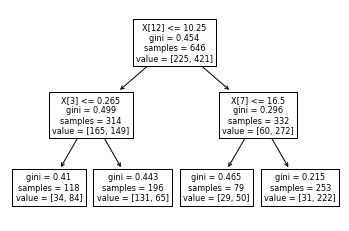

In [ ]:
from sklearn.tree import plot_tree

plot_tree(best_tree)

# Spalte 12: "alcohol", Spalte 3: "volatile acidity", Spalte 7: "free sulfur dioxide"

In [ ]:
training_set.corr()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.728289,0.237299,0.493932,-0.236121,-0.221699,0.439806,-0.330525,-0.555552,0.201053,0.190846,0.278905,0.124004,-0.089352
type,-0.728289,1.000000,-0.470657,-0.666382,0.208911,0.351560,-0.621337,0.486668,0.702174,-0.422078,-0.351211,-0.418650,0.012011,0.083908
fixed acidity,0.237299,-0.470657,1.000000,0.208782,0.270234,-0.101261,0.290793,-0.317007,-0.338779,0.484218,-0.244485,0.219120,-0.125235,-0.102915
volatile acidity,0.493932,-0.666382,0.208782,1.000000,-0.452910,-0.192600,0.446865,-0.361742,-0.424440,0.293282,0.296270,0.237261,-0.008114,-0.248996
citric acid,-0.236121,0.208911,0.270234,-0.452910,1.000000,0.120401,-0.096229,0.146185,0.210885,0.055540,-0.253113,0.001328,0.002615,0.100331
residual sugar,-0.221699,0.351560,-0.101261,-0.192600,0.120401,1.000000,-0.160054,0.402136,0.486903,0.512335,-0.311129,-0.189997,-0.357985,-0.063394
chlorides,0.439806,-0.621337,0.290793,0.446865,-0.096229,-0.160054,1.000000,-0.283456,-0.373869,0.416032,0.119559,0.397246,-0.243375,-0.122648
free sulfur dioxide,-0.330525,0.486668,-0.317007,-0.361742,0.146185,0.402136,-0.283456,1.000000,0.722273,-0.010114,-0.144286,-0.227095,-0.178184,-0.042953
total sulfur dioxide,-0.555552,0.702174,-0.338779,-0.424440,0.210885,0.486903,-0.373869,0.722273,1.000000,-0.009053,-0.229227,-0.253872,-0.250513,-0.076602
density,0.201053,-0.422078,0.484218,0.293282,0.055540,0.512335,0.416032,-0.010114,-0.009053,1.000000,0.015389,0.223213,-0.686570,-0.287267


In [ ]:
# Hyperparameter Optimierung von max_depth, criterion, max_features, splitter mit einfacher Validierung
trees = []
val_scores = []
counter = 0
mds = range(1,31)
cs = ["gini", "entropy"]
mfs = ["sqrt", "log2", 0.25, 0.5, 0.75, None]
sps = ["best", "random"]
for i in mds:
  for j in cs:
    for k in mfs:
      for s in sps:
        trees.append(DecisionTreeClassifier(max_depth=i,criterion=j,splitter=s,max_features=k).fit(X_train,y_train))
        val_scores.append(trees[counter].score(X_val,y_val))
        counter += 1
best_index = np.argmax(val_scores)
best_tree = trees[best_index].fit(X,y)
print(str(best_tree) + "; valid score: "+str(val_scores[best_index])+ "; test score: "+str(best_tree.score(X_test,y_test)))

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=0.5); valid score: 0.8062015503875969; test score: 0.6859205776173285


In [ ]:
# Hyperparameter Optimierung der max_depth mit 5-facher Kreuzvalidierung
from sklearn.model_selection import cross_val_score

trees = []
mean_cross_val_scores = []
min_tree_depth = 1
max_tree_depth = 31
for i in range(min_tree_depth,max_tree_depth):
  # wir können hier zur Bewertung jetzt alle Daten aus dem Trainingsset nehmen und brauchen keine Unterteilung in Train/Validation mehr; 
  # außerdem fitten wir den Baum nicht, das erledigt die Fkt cross_val_score automatisch
  trees.append(DecisionTreeClassifier(max_depth=i)) 
  mean_cross_val_scores.append(np.mean(cross_val_score(trees[i-min_tree_depth],X,y,cv=5)))
best_index = np.argmax(mean_cross_val_scores)
best_tree = trees[best_index].fit(X,y)
print(str(best_tree) + "; mean cross valid score: "+str(best_tree.score(X_val,y_val))+ "; test score: "+str(best_tree.score(X_test,y_test)))

DecisionTreeClassifier(max_depth=2); mean cross valid score: 0.7906976744186046; test score: 0.7354306343476018


In [ ]:
# Hyperparameter Optimierung von max_depth, criterion, max_features, splitter mit 5-facher Kreuzvalidierung
from sklearn.model_selection import cross_val_score

trees = []
mean_cross_val_scores = []
counter = 0
mds = range(1,31)
cs = ["gini", "entropy"]
mfs = ["sqrt", "log2", 0.25, 0.5, 0.75, None]
sps = ["best", "random"]
for i in mds:
  for j in cs:
    for k in mfs:
      for s in sps:
        trees.append(DecisionTreeClassifier(max_depth=i,criterion=j,splitter=s,max_features=k)) 
        mean_cross_val_scores.append(np.mean(cross_val_score(trees[counter],X,y,cv=5)))
        counter += 1
best_index = np.argmax(mean_cross_val_scores)
best_tree = trees[best_index].fit(X,y)
print(str(best_tree) + "; mean cross valid score: "+str(best_tree.score(X_val,y_val))+ "; test score: "+str(best_tree.score(X_test,y_test)))

DecisionTreeClassifier(max_depth=2); mean cross valid score: 0.7906976744186046; test score: 0.7354306343476018


In [ ]:
# Hyperparameter Optimierung der max_depth mit 5-facher Kreuzvalidierung; Optimiert wird dieses mal nach 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

trees = []
mean_cross_val_scores = []
min_tree_depth = 1
max_tree_depth = 31
for i in range(min_tree_depth,max_tree_depth):
  # wir können hier zur Bewertung jetzt alle Daten aus dem Trainingsset nehmen und brauchen keine Unterteilung in Train/Validation mehr; 
  # außerdem fitten wir den Baum nicht, das erledigt die Fkt cross_val_score automatisch
  trees.append(DecisionTreeClassifier(max_depth=i)) 
  mean_cross_val_scores.append(np.mean(cross_val_score(trees[i-min_tree_depth],X,y,cv=5,scoring='f1_weighted')))
best_index = np.argmax(mean_cross_val_scores)
best_tree = trees[best_index].fit(X,y)
y_test_predictions = best_tree.predict(X_test)
print(str(best_tree) + "; mean cross valid score (f1_weighted): "+str(best_tree.score(X_val,y_val))+ "; test score (f1_weighted): "+str(f1_score(y_test,y_test_predictions,average='weighted')))

DecisionTreeClassifier(max_depth=2); mean cross valid score (f1_weighted): 0.7906976744186046; test score (f1_weighted): 0.7290780845904542
